In [2]:
from logging import critical

import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:

#read in the file with the data
measurement_01_data = np.loadtxt('data/Measurement 1_1046', skiprows= 7 )
measurement_02_data = np.loadtxt('data/Measurement 2_1121', skiprows=7)
measurement_03_data = np.loadtxt('data/Measurement 3_1205', skiprows = 7)
measurement_04_data = np.loadtxt('data/Measurement 4_1225_B-field 15A', skiprows = 7)
measurement_05_data = np.loadtxt('data/Measurement 5_1300_B-field 15A', skiprows = 7)
measurement_06_data = np.loadtxt('data/Measurement 6_1349_Over night', skiprows = 7)
measurement_07_data = np.loadtxt('data/Measurement 6_1349_Over night_right', skiprows = 7)

Tbefore, I+, V+, I-, V-, Tafter, Tbase,Time


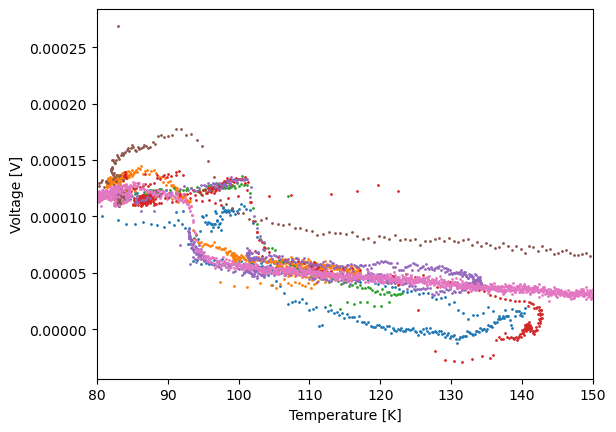

In [4]:
#plot the temperature average against the average of voltage
all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data, measurement_06_data, measurement_07_data]

for data in all_data :
    plt.scatter(data[:,5],data[:,4], s = 1)
    plt.xlabel('Temperature [K]')
    plt.ylabel('Voltage [V]')
    plt.xlim(80,150)


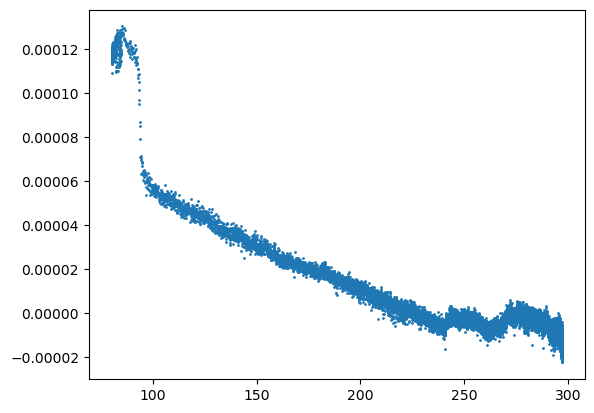

In [5]:
plt.scatter(measurement_07_data[:,5], measurement_07_data[:,4], s =1)

# Auswertungsidee

## Mache zuerst alle Auswertungen für das erste Datenset

1. Show heatin and cooling curve
2. show the averaged voltage against the temperature distinguish between heating and cooling with colours
3. 

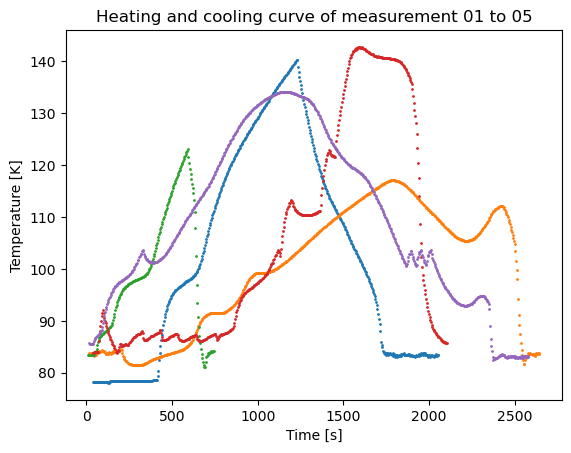

In [6]:
# 1. Show heating and cooling curve
#temperature_uncertainty_01 =  np.abs(measurement_01_data[:,5] - measurement_01_data[:,0])

measurement_01_data_average_temperature = (measurement_01_data[:,0] + measurement_01_data[:,5]) / 2
measurement_02_data_average_temperature = (measurement_02_data[:,0] + measurement_02_data[:,5]) / 2
measurement_03_data_average_temperature = (measurement_03_data[:,0] + measurement_03_data[:,5]) / 2
measurement_04_data_average_temperature = (measurement_04_data[:,0] + measurement_04_data[:,5]) / 2
measurement_05_data_average_temperature = (measurement_05_data[:,0] + measurement_05_data[:,5]) / 2
measurement_06_data_average_temperature = (measurement_06_data[:,0] + measurement_06_data[:,5]) / 2
measurement_07_data_average_temperature = (measurement_07_data[:,0] + measurement_07_data[:,5]) / 2


plt.scatter(measurement_01_data[:,7],measurement_01_data_average_temperature, s = 1)
plt.scatter(measurement_02_data[:,7],measurement_02_data_average_temperature, s = 1)
plt.scatter(measurement_03_data[:,7],measurement_03_data_average_temperature, s = 1)
plt.scatter(measurement_04_data[:,7],measurement_04_data_average_temperature, s = 1)
plt.scatter(measurement_05_data[:,7],measurement_05_data_average_temperature, s = 1)

#add error bars to the plot
plt.errorbar(measurement_01_data[:,7],measurement_01_data_average_temperature, fmt = 'none')



plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.title('Heating and cooling curve of measurement 01 to 05')
plt.show()




## Discussion
The heatin and cooling curves are pretty inconsistent due to some handling problems with the measurement device 
setting and restting the goal temperature was not very helpfull to get a consistent curve.

It should not matter that much for the further analysis, since the volatage is only dependent on the temperature and 
not on the time.$

## Error bars not plotted because versy small would oly make it unreadable



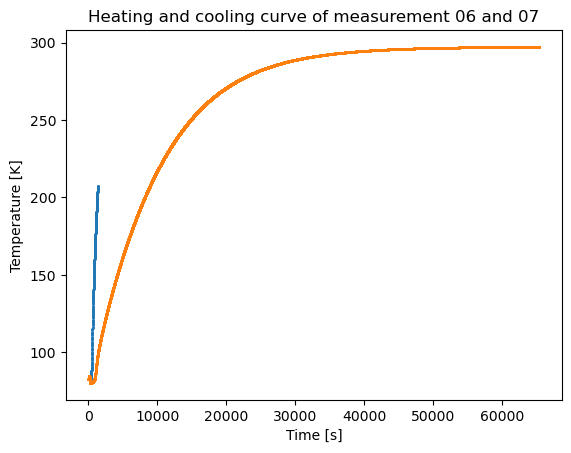

In [7]:
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.title('Heating and cooling curve of measurement 06 and 07')
plt.scatter(measurement_06_data[:,7],measurement_06_data_average_temperature, s = 1)
plt.scatter(measurement_07_data[:,7],measurement_07_data_average_temperature, s = 1)
plt.show()

## Discussion
The measurement number 6 was interrupted and the goal temperature was reset. This is why the curve is complete the 
other one ran over night and is a complete curve.

Text(0.5, 1.0, 'Voltage V+ against temperature')

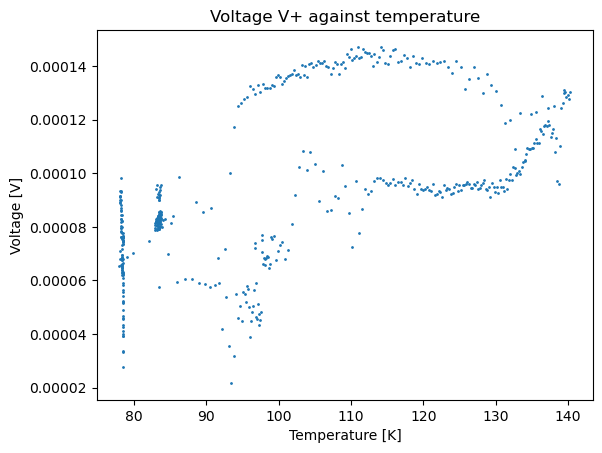

In [24]:
#plot the original T before Data versis the V + data
plt.scatter(measurement_01_data[:,0], measurement_01_data[:,2], s = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.title('Voltage V+ against temperature')

Text(0.5, 1.0, 'Voltage V- against temperature')

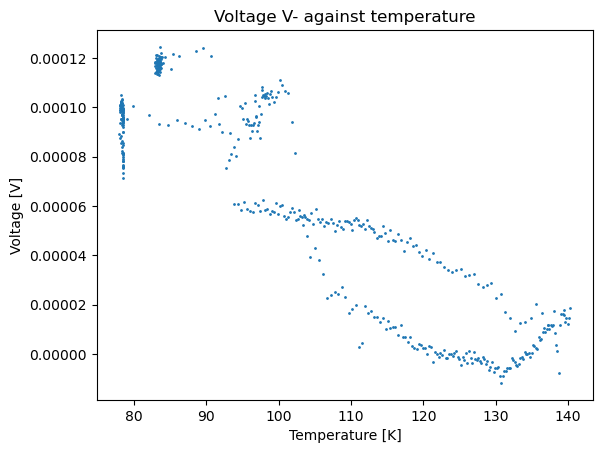

In [25]:
#plot the original T before Data versus the V - data
plt.scatter(measurement_01_data[:,0], measurement_01_data[:,4], s = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.title('Voltage V- against temperature')



this data looks not easy to interpret, lets try to plot the data binned into temperature steps o 1 kelvin


# Data preprocessing of Voltage data
- split cooling from heating 
- bin the data  
- average the data from V+ and V-
- make bins based on the averge measured temperatures

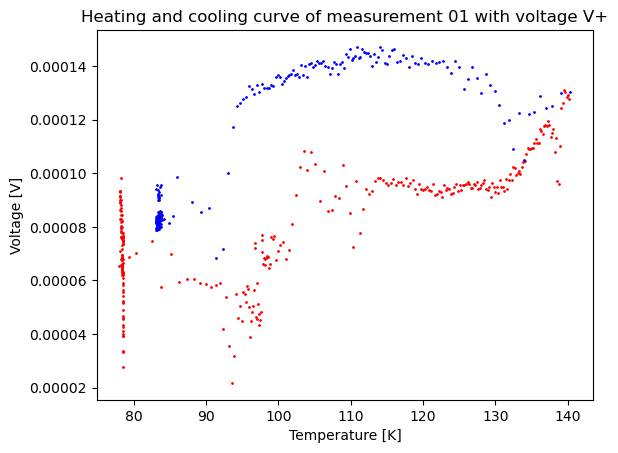

In [26]:
#split the data into heating and cooling
#index of the maximal temperature
max_temperature_index = np.argmax(measurement_01_data_average_temperature)
heating_data = measurement_01_data[:max_temperature_index]
cooling_data = measurement_01_data[max_temperature_index:]

average_heating_temperature = (heating_data[:,0] + heating_data[:,5]) / 2
average_cooling_temperature = (cooling_data[:,0] + cooling_data[:,5]) / 2



#bin the data into small bins for the temperature and then show how they look
plt.scatter(average_heating_temperature, heating_data[:,2], s = 1, color = 'red')
plt.scatter(average_cooling_temperature, cooling_data[:,2], s = 1, color = 'blue')
plt.title('Heating and cooling curve of measurement 01 with voltage V+')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')

plt.show()

In [9]:
#bin the data into small bins for the temperature and then show how they look 

scipy.stats.binned_statistic(heating_data[:,5], heating_data[:,4], bins = 10)

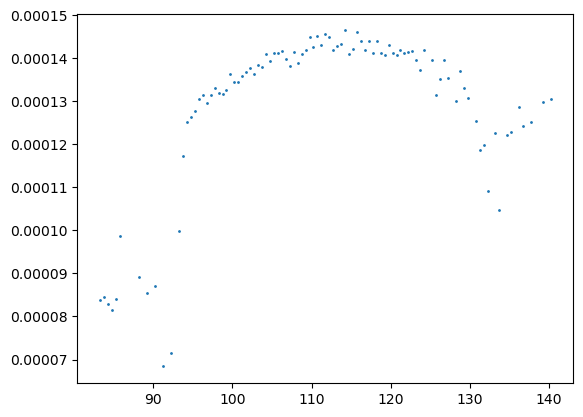

In [33]:
#bin the cooling data into small bins for the temperature and then show how they look


bin_edges = np.arange(np.floor(average_cooling_temperature.min()), np.ceil(average_cooling_temperature.max()) + 1, 0.5)

# Compute the average voltage for each degree of temperature
binned_statistic = scipy.stats.binned_statistic(average_cooling_temperature, cooling_data[:,2], statistic='mean', 
                                                bins=bin_edges)

# Extract the bin centers and the average voltages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
average_voltages = binned_statistic.statistic
#plot the mean of each bin against the temperature

plt.scatter(bin_centers, average_voltages, s = 1)

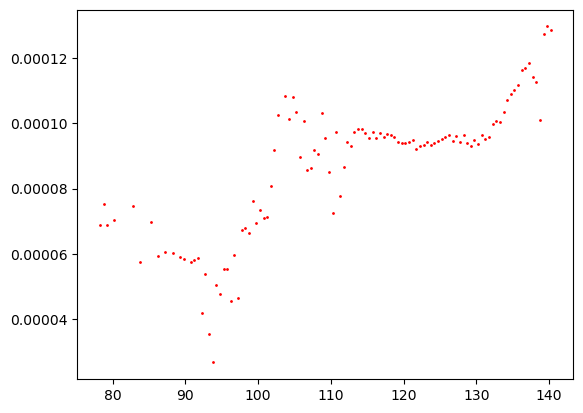

In [35]:
#same for heting data
bin_edges = np.arange(np.floor(average_heating_temperature.min()), np.ceil(average_heating_temperature.max()) + 1, 0.5)

# Compute the average voltage for each degree of temperature
binned_statistic = scipy.stats.binned_statistic(average_heating_temperature, heating_data[:,2], statistic='mean', 
                                                bins=bin_edges)

# Extract the bin centers and the average voltages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
average_voltages = binned_statistic.statistic
#plot the mean of each bin against the temperature
plt.scatter(bin_centers, average_voltages, s = 1, color = 'red')

# Evaluation 
Plot the different curves of each run and develop a Vorgehen to determine the T_c

# NOrmal Electrical behaveiour
- show the behaviour of the sample above the critical temperature 
- is the dependency quadratic or linear ? fit to the curve
- 